In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

2.12.0


In [12]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Final_datateset_for_Image.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Final_datateset_for_Image.zip')
f.keys()
!unzip Final_datateset_for_Image.zip

Streaming output truncated to the last 5000 lines.
  inflating: Final datateset for Image/validation/happy/15966.jpg  
  inflating: Final datateset for Image/validation/happy/15976.jpg  
  inflating: Final datateset for Image/validation/happy/15983.jpg  
  inflating: Final datateset for Image/validation/happy/16037.jpg  
  inflating: Final datateset for Image/validation/happy/16042.jpg  
  inflating: Final datateset for Image/validation/happy/16064.jpg  
  inflating: Final datateset for Image/validation/happy/16076.jpg  
  inflating: Final datateset for Image/validation/happy/16081.jpg  
  inflating: Final datateset for Image/validation/happy/16106.jpg  
  inflating: Final datateset for Image/validation/happy/16108.jpg  
  inflating: Final datateset for Image/validation/happy/16120.jpg  
  inflating: Final datateset for Image/validation/happy/16141.jpg  
  inflating: Final datateset for Image/validation/happy/16192.jpg  
  inflating: Final datateset for Image/validation/happy/16198.jpg

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers.serialization import activation
import numpy as np
import random as rn

In [14]:
train_dir = '/content/Final datateset for Image/train'  
validation_dir = '/content/Final datateset for Image/validation'

In [15]:
BATCH_SIZE = 50
IMG_SIZE = (224, 224)
no_classes = 13

In [16]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

Found 29183 files belonging to 13 classes.
Found 7358 files belonging to 13 classes.


In [18]:
class_names = train_dataset.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'joiariya', 'meghna', 'neutral', 'nitul', 'rafat', 'rasa', 'romiz', 'sad', 'surprise']


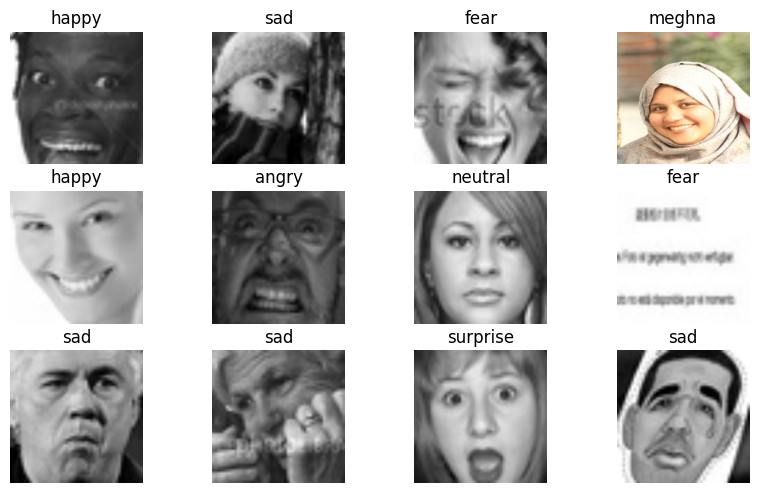

In [31]:
#visulized some random Image With their Label
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(12):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [32]:
# preprocessing

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=50,
                                                    class_mode ='categorical',
                                                    subset='training')

Found 17514 images belonging to 13 classes.


In [33]:
test_generator = train_datagen.flow_from_directory(validation_dir,
                                                   target_size=(224,224),
                                                   batch_size=50,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2939 images belonging to 13 classes.


In [37]:
# Build  RESNET50 Model
num_classes = 13

base_model = ResNet50(include_top= False, weights= 'imagenet')

x= base_model.output
x= GlobalAveragePooling2D()(x)
x= Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs =base_model.input,outputs=predictions)

In [38]:
for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(train_generator,epochs=10)

Epoch 1/10
351/351 [==============================] - 226s 630ms/step - loss: 1.5930 - accuracy: 0.4198
Epoch 2/10
351/351 [==============================] - 218s 620ms/step - loss: 1.3451 - accuracy: 0.4917
Epoch 3/10
351/351 [==============================] - 214s 609ms/step - loss: 1.2853 - accuracy: 0.5095
Epoch 4/10
351/351 [==============================] - 216s 614ms/step - loss: 1.2405 - accuracy: 0.5301
Epoch 5/10
351/351 [==============================] - 214s 608ms/step - loss: 1.2151 - accuracy: 0.5396
Epoch 6/10
351/351 [==============================] - 209s 596ms/step - loss: 1.1848 - accuracy: 0.5525
Epoch 7/10
351/351 [==============================] - 215s 613ms/step - loss: 1.1639 - accuracy: 0.5594
Epoch 8/10
351/351 [==============================] - 212s 603ms/step - loss: 1.1363 - accuracy: 0.5699
Epoch 9/10
351/351 [==============================] - 210s 597ms/step - loss: 1.1175 - accuracy: 0.5823
Epoch 10/10
351/351 [==============================] - 209s 595m

Accuracy:  0.5825625061988831


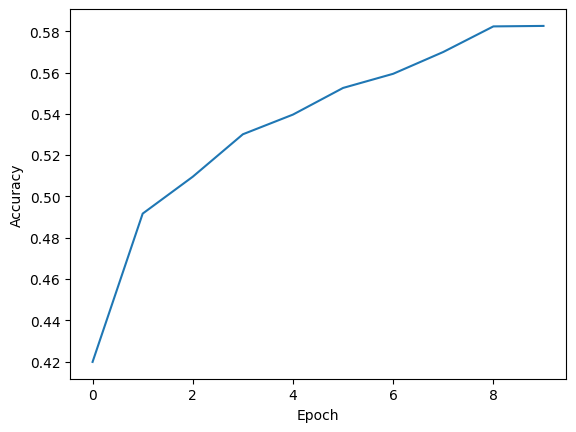

In [42]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
print("Accuracy: ",max(history.history['accuracy']))
plt.show()

In [51]:
#Testing

from tensorflow.keras.preprocessing import image
import numpy as np

img_pred=image.load_img("/content/Final datateset for Image/validation/meghna/32.jpg",target_size=(224,224))

img_pred = np.expand_dims(img_pred, axis=0)
rslt = model.predict(img_pred)

print(rslt)

1/1 [==============================] - 0s 38ms/step
[[9.8803321e-07 3.1169539e-10 2.9207633e-05 1.6937207e-05 2.6232774e-06
  9.9992132e-01 7.2812059e-06 6.2674928e-11 9.3543467e-06 9.5166416e-07
  3.6113224e-08 2.8423042e-06 8.4866215e-06]]


In [52]:
if rslt[0][0]>rslt[0][1]:
  prediction = "Meghna"

else:
  prediction = "Rafat"


print(prediction)

Meghna
